# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

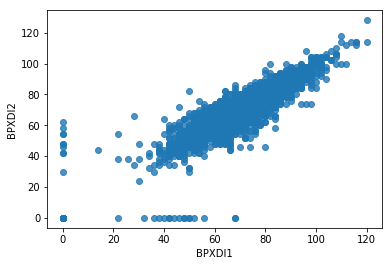

In [5]:
sns.regplot(x='BPXDI1', y='BPXDI2', data=da, fit_reg=False)
plt.show()

In [8]:
# corr matrix
print(da[['BPXSY1', 'BPXSY2']].dropna().corr())
print()
print(da[['BPXDI1', 'BPXDI2']].dropna().corr())

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

_Both the measurements are considerably strongly correlated. But the repeated measurements of systolic blood pressure are more strongly correlated than those of the diastolic blood pressure._

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

_No. When measuring the correlation between 2 variables, the order in which the variables are considered doesn't matter._

## Question 2

Log transform the four blood pressure variables and repeat question 1.

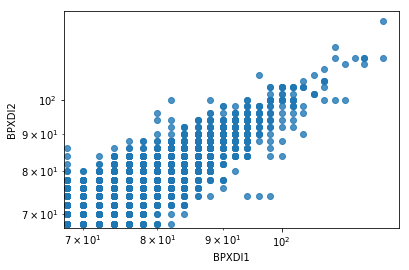

In [16]:
splot = sns.regplot(x='BPXDI1', y='BPXDI2', data=da, fit_reg=False)
splot.set(xscale='log', yscale='log')

# plt.xscale('log')
# plt.yscale('log')

plt.show()

In [31]:
req_cols = ['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']

da_bp_log = da[req_cols].transform(np.log)

print(da_bp_log[['BPXSY1', 'BPXSY2']].dropna().corr())
print()
print(da_bp_log[['BPXDI1', 'BPXDI2']].dropna().corr())

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.958549
BPXSY2  0.958549  1.000000

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.888256
BPXDI2  0.888256  1.000000


__Q2a.__ Does the correlation analysis on log tranformed data lead to any important insights that the correlation analysis on the untransformed data missed?

Not really. There is not much difference in the correlation values. They both are pretty strong and the correlation between repeated measurements of systolic blood pressure is still greater than that of the diastolic blood pressure.

## Question 3

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

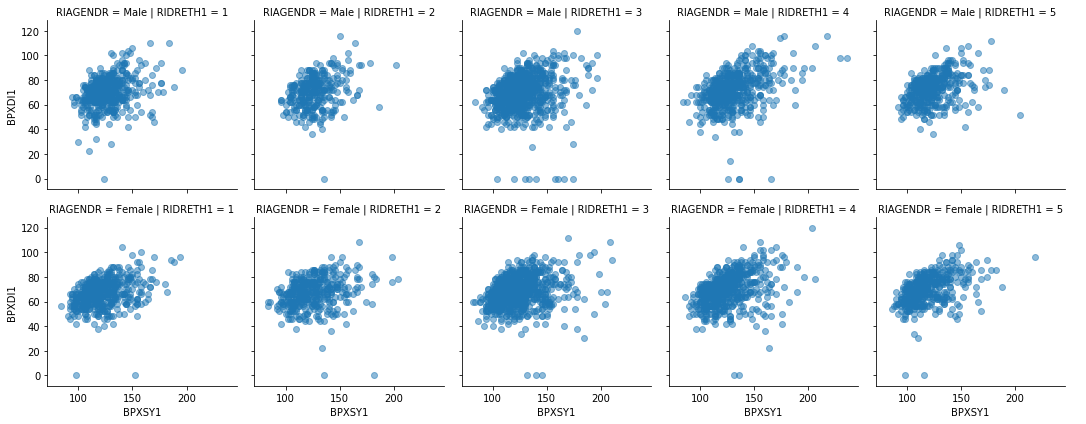

In [33]:
da['RIAGENDR'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})

_ = sns.FacetGrid(da, col='RIDRETH1', row='RIAGENDR').map(plt.scatter, 'BPXSY1', 'BPXDI1', alpha=0.5).add_legend()


__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

For a given ethnicity and gender the relationship is pretty linear with strong correlation. For females, we can see that the distribution of the relationship is pretty linear and tight in 1st and 5th ethnic groups. Where as it is a lot more spread out towards the higher end in 2,3,4 ethnic groups. There are more outliers toward the higher end of measurements.

For males, the relationship is very strong and tight for ethnic groups 2,3,5 and seems a bit dispersed for 1 and 4. As we move across the ethnic groups, we can see that the relationship varies similarly for male and female but the outliers and dispersion on the higher end might be more pronounced for males in 1,5 for males and 2,3,4 for females.

In ethnic group 2, females have slightly smaller diastolic bp measurements while males have smaller diastolic measurements.

## Question 4

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

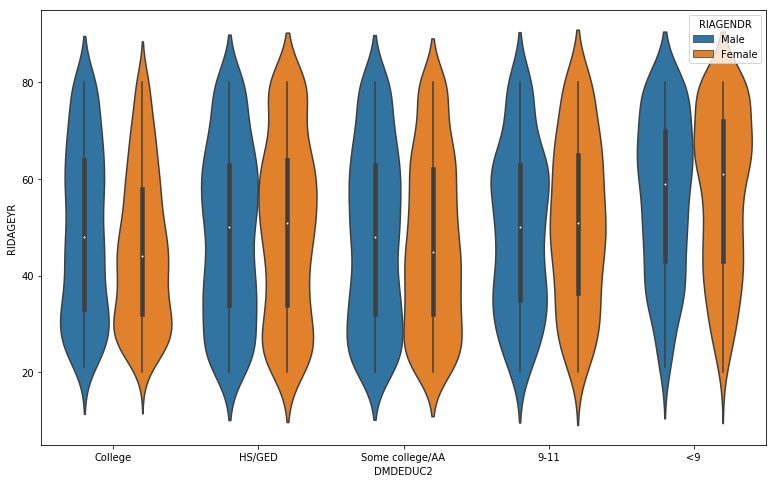

In [48]:
da["DMDEDUC2"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

db = da.loc[(da.DMDEDUC2 != "Don't know"), :]

plt.figure(figsize=(13,8))
sns.violinplot(x=db.DMDEDUC2, y=db.RIDAGEYR, hue=db.RIAGENDR, height=8.27, aspect=11.7/8.27)

plt.show()

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

For HS/GED, 9-11 and <9 groups the median for male and female is similar and the distributions are pretty similar except for 9-11 group in which males have a little more variation when compared to females.

For college and some college/AA groups, the median age of females is a little lower than males at may be around 44 and 48 respectively.

## Question 5

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

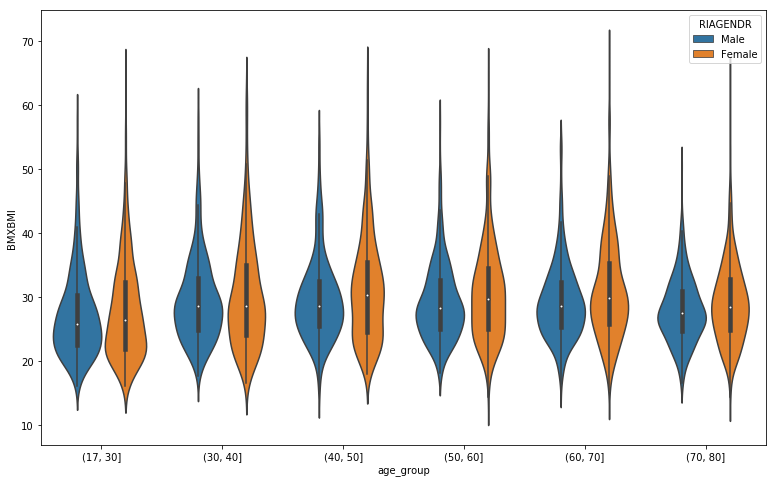

In [50]:
# BMXBMI

da['age_group'] = pd.cut(da.RIDAGEYR, [17,30,40,50,60,70,80])

plt.figure(figsize=(13,8))
sns.violinplot(x=da.age_group, y=da.BMXBMI, hue=da.RIAGENDR)
plt.show()


__Q5a.__ Comment on the trends in BMI across the demographic groups.

BMI for males and females follows similar trend as we move up across the age groups. For males, the distribution is wider in the center where as it is narrower for the females. Both for males and femlaes, BMI increases as age increases but follows a downward trend after 40-50 age group. The median BMI seems to centered around 25 with most of the measurements falling between 20-30.

## Question 6

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [59]:
da_ct = pd.crosstab(da.RIDRETH1, da.HIQ210, normalize='index')
print(da_ct)
print(da_ct.values.min())

HIQ210         1.0       2.0       9.0
RIDRETH1                              
1         0.137982  0.857567  0.004451
2         0.128696  0.871304  0.000000
3         0.067354  0.931432  0.001214
4         0.108654  0.890385  0.000962
5         0.081761  0.915723  0.002516
0.0


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Ethnic group 2
